## Author Identification Algorithm: Decision Trees vs Random Forest
### Feature Engineering Approach: Word and Character based Feature Extraction

Notebook Programmers: <br>
Rommel Urbano Jr. <br>
Joshua Paulino <br>
Jeffrey Ajero <br>

In [11]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline
%matplotlib notebook

In [12]:
train=pd.read_csv('C:/Users/Asus/Desktop/train.csv')
train=train.iloc[:,[1,2]]

In [13]:
print(train.shape)
train.head()

(19579, 2)


,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [14]:
import string
def unique_word_fraction(row):
    """function to calculate the fraction of unique words on total words of the text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    unique_count = list(set(text_splited)).__len__()
    return (unique_count)


eng_stopwords = set(stopwords.words("english"))
def stopwords_count(row):
    """ Number of stopwords fraction in a text"""
    text = row['text'].lower()
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    stopwords_count = len([w for w in text_splited if w in eng_stopwords])
    return (stopwords_count)


def punctuations_fraction(row):
    """functiopn to claculate the fraction of punctuations over total number of characters for a given text """
    text = row['text']
    char_count = len(text)
    punctuation_count = len([c for c in text if c in string.punctuation])
    return (punctuation_count)


def char_count(row):
    """function to return number of characters """
    return len(row['text'])

def fraction_noun(row):
    """function to give us fraction of noun over total words """
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    return (noun_count)

def fraction_adj(row):
    """function to give us fraction of adjectives over total words in given text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    return (adj_count)

def fraction_verbs(row):
    """function to give us fraction of verbs over total words in given text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return (verbs_count)

def lowercase(value):
    value = str(value)
    return value.lower()

def count_word_in_sentence(x):
    word_list = x['text'].split(' ')
    return len(word_list)

def count_word_in_clean_sentence(stop_words,train):
    word_tokens = word_tokenize(train['text']) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return len(filtered_sentence)

def convert_label(v):
    if v == 'EAP':
        return 0
    elif v == 'HPL':
        return 1
    elif v == 'MWS':
        return 2
    
def determine_past_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    past_tense_count = len([word for word in tagged if word[1] in ["VBD", "VBN"]]) 
    return(past_tense_count)

def determine_present_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    present_tense_count = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
    return(present_tense_count)

def determine_future_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    future_tense_count = len([word for word in tagged if word[1] == ["VBC", "VBF"]])
    return(future_tense_count)

def count_sentences(x):
    word_list = x['text'].split('.')
    return len(word_list)-1

def count_dots(x):
    word_list = x['text'].count('.')
    return word_list

def count_commas(x):
    word_list = x['text'].count(',')
    return word_list

def count_semicolon(x):
    word_list = x['text'].count(';')
    return word_list

def count_colon(x):
    word_list = x['text'].count(':')
    return word_list

def count_exclamation(x):
    word_list = x['text'].count('!')
    return word_list

def count_questionmark(x):
    word_list = x['text'].count('?')
    return word_list

def classification_accuracy(X,y):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import log_loss
    results = confusion_matrix(X, y)
    print ('Confusion Matrix :')
    print(results)
    print ('Accuracy Score is',accuracy_score(X, y))
    print ('Classification Report : ')
    print (classification_report(X, y))

In [15]:
# train['text'] = train.apply(lambda x: lowercase(x), axis=1)
train['number_of_words_before_clean'] = train.apply(lambda x: count_word_in_sentence(x),axis=1)
train['unique_words'] = train.apply(lambda row: unique_word_fraction(row), axis =1)
train['stopwords_count'] = train.apply(lambda row: stopwords_count(row), axis =1)
train['punctuations'] = train.apply(lambda row: punctuations_fraction(row), axis =1)
train['char_count'] = train.apply(lambda row: char_count(row), axis =1)
train['noun'] = train.apply(lambda row: fraction_noun(row), axis =1)
train['adj'] = train.apply(lambda row: fraction_adj(row), axis =1)
train['verbs'] = train.apply(lambda row: fraction_verbs(row), axis =1)
train['past_tenses'] = train.apply(lambda row: determine_past_tense_input(row), axis =1)
train['present_tenses'] = train.apply(lambda row: determine_present_tense_input(row), axis =1)
train['future_tenses'] = train.apply(lambda row: determine_future_tense_input(row), axis =1)
train['sentence_count'] = train.apply(lambda row: count_sentences(row), axis =1)
train['count_period'] = train.apply(lambda row: count_dots(row), axis =1)
train['count_commas'] = train.apply(lambda row: count_commas(row), axis =1)
train['count_semicolon'] = train.apply(lambda row: count_semicolon(row), axis =1)
train['count_colon'] = train.apply(lambda row: count_colon(row), axis =1)
train['count_exclamation'] = train.apply(lambda row: count_exclamation(row), axis =1)
train['count_questionmark'] = train.apply(lambda row: count_questionmark(row), axis =1)
train['author'] = train.apply(lambda x: convert_label(x['author']), axis=1)

for i in range(0,len(train['text'])):
    train['text'][i]=re.sub('([^A-Za-z\'\ ])','',train['text'][i])

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 

train['number_of_words_after_clean'] = train.apply(lambda x: count_word_in_clean_sentence(stop_words,x),axis=1)

<ipython-input-15-1c4740ddd2fb>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
train.head(10)

,text,author,number_of_words_before_clean,unique_words,stopwords_count,punctuations,char_count,noun,adj,verbs,...,present_tenses,future_tenses,sentence_count,count_period,count_commas,count_semicolon,count_colon,count_exclamation,count_questionmark,number_of_words_after_clean
0,This process however afforded me no means of a...,0,41,35,20,7,231,10,2,6,...,3,0,1,1,4,2,0,0,0,24
1,It never once occurred to me that the fumbling...,1,14,14,8,1,71,2,1,2,...,0,0,1,1,0,0,0,0,0,7
2,In his left hand was a gold snuff box from whi...,0,36,32,17,5,200,10,5,4,...,1,0,1,1,4,0,0,0,0,20
3,How lovely is spring As we looked from Windsor...,2,34,32,13,4,206,10,6,5,...,2,0,1,1,3,0,0,0,0,23
4,Finding nothing else not even gold the Superin...,1,27,25,11,4,174,6,1,6,...,4,0,1,1,2,1,0,0,0,16
5,A youth passed in solitude my best years spent...,2,83,66,43,6,468,18,6,17,...,5,0,1,1,4,0,1,0,0,44
6,The astronomer perhaps at this point took refu...,0,21,21,9,5,128,6,2,3,...,0,0,1,1,3,1,0,0,0,13
7,The surcingle hung in ribands from my body,0,8,8,4,1,43,4,0,0,...,0,0,1,1,0,0,0,0,0,5
8,I knew that you could not say to yourself 'ste...,0,88,62,46,11,488,11,7,15,...,2,0,1,1,7,1,0,0,0,47
9,I confess that neither the structure of langua...,2,23,18,12,3,144,7,1,2,...,1,0,1,1,2,0,0,0,0,12


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures


X= pd.DataFrame(train[['number_of_words_before_clean','unique_words','stopwords_count','punctuations',
                       'char_count','noun','adj','verbs','past_tenses','present_tenses',
                       'future_tenses','sentence_count','count_period','number_of_words_after_clean']])
y= pd.DataFrame(train['author'])

X.head()

,number_of_words_before_clean,unique_words,stopwords_count,punctuations,char_count,noun,adj,verbs,past_tenses,present_tenses,future_tenses,sentence_count,count_period,number_of_words_after_clean
0,41,35,20,7,231,10,2,6,2,3,0,1,1,24
1,14,14,8,1,71,2,1,2,1,0,0,1,1,7
2,36,32,17,5,200,10,5,4,3,1,0,1,1,20
3,34,32,13,4,206,10,6,5,3,2,0,1,1,23
4,27,25,11,4,174,6,1,6,1,4,0,1,1,16


In [77]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2,k=10) 
X =pd.DataFrame( chi2_features.fit_transform(X, y),columns=['number_of_words_before_clean','unique_words',
                                                            'stopwords_count','punctuations','char_count','noun',
                                                            'adj','verbs','past_tenses','number_of_words_after_clean'])
# X=X.drop(['future_tenses'],axis=1)
chi2_features.scores_


array([ 837.97587258, 1053.40489601,  365.22618068,  704.97187538,
       4488.96331585,  470.17879878,  540.45064491,  637.03596599,
        984.80629104, 1183.08897699])

In [78]:
X

,number_of_words_before_clean,unique_words,stopwords_count,punctuations,char_count,noun,adj,verbs,past_tenses,number_of_words_after_clean
0,41,35,20,7,231,10,2,6,2,24
1,14,14,8,1,71,2,1,2,1,7
2,36,32,17,5,200,10,5,4,3,20
3,34,32,13,4,206,10,6,5,3,23
4,27,25,11,4,174,6,1,6,1,16
...,...,...,...,...,...,...,...,...,...,...
19574,20,18,12,3,108,3,1,5,4,10
19575,10,10,6,1,55,2,0,1,1,5
19576,13,13,4,2,68,6,0,3,1,9
19577,15,14,8,3,74,2,0,3,2,8


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>


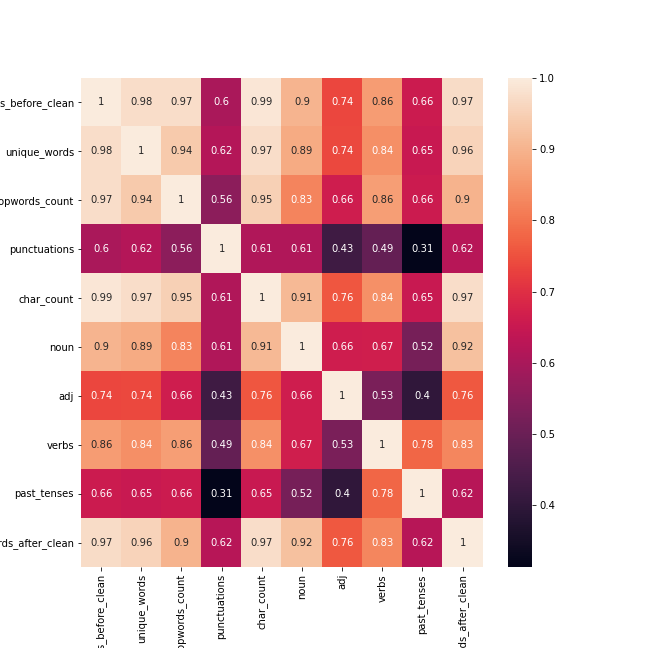

<IPython.core.display.Javascript object>


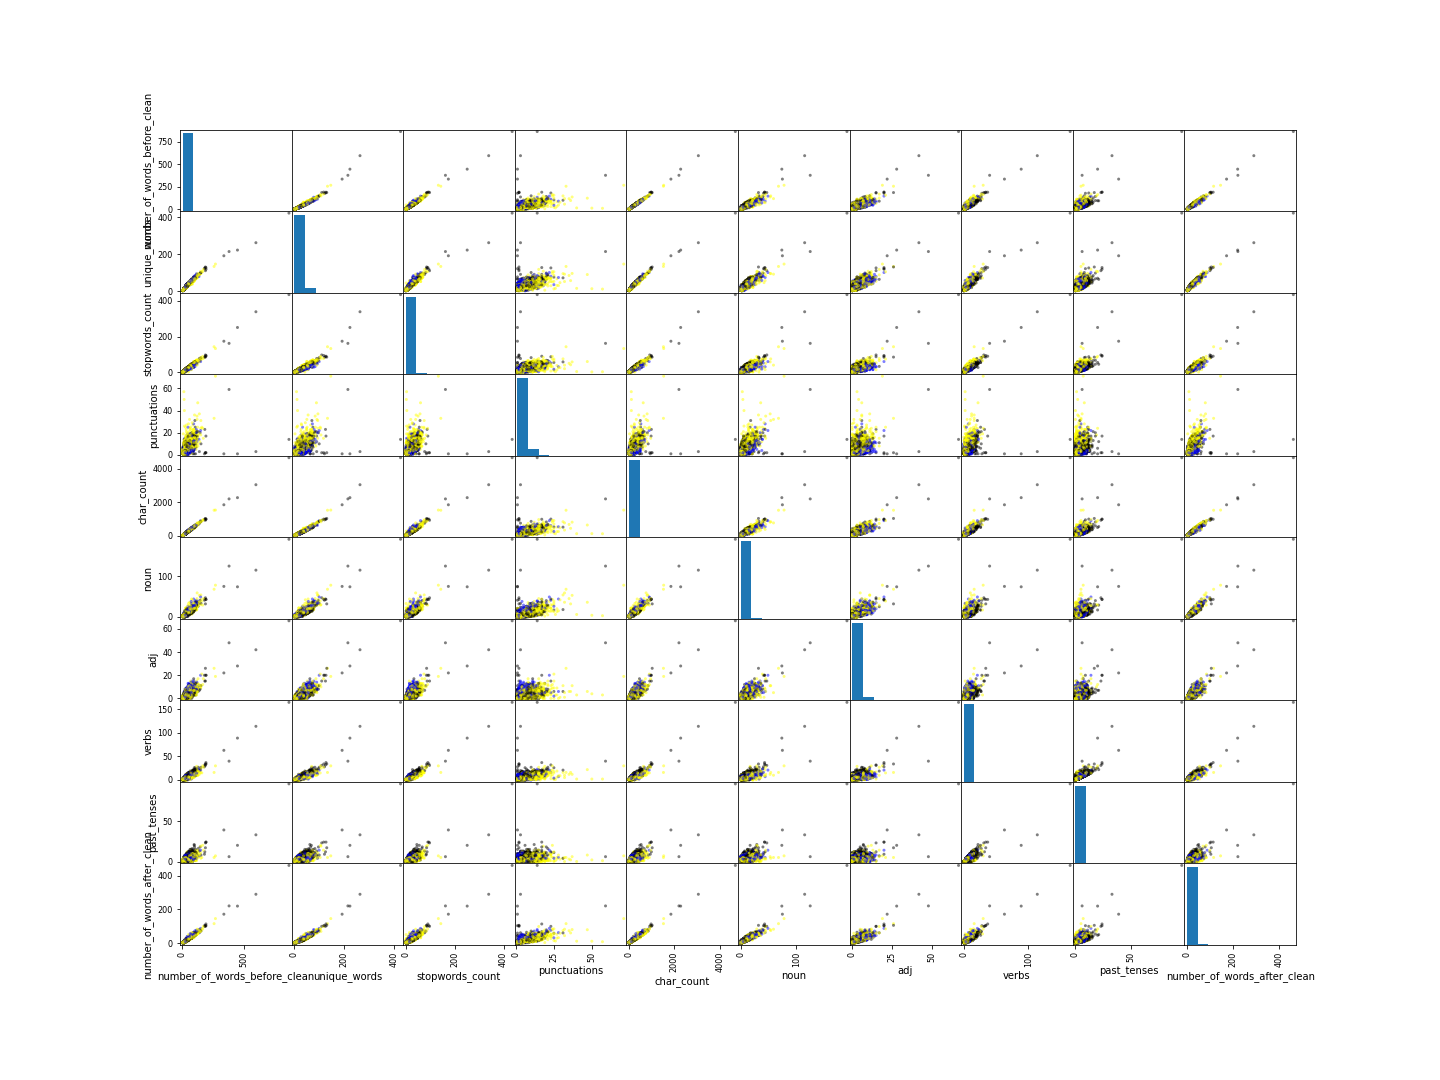

In [88]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure(figsize=(9, 9))
correlation = X.corr()
heatmap = sns.heatmap(correlation, annot=True)
plt.show()

cmap=cmap_bold
temp=pd.DataFrame(X)
scatter=pd.plotting.scatter_matrix(temp,c=train['author'],figsize=(20,15),cmap=cmap)


In [81]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=6)
tree.fit(X_train_scaled,y_train)
print('Train Set R-Score: ',tree.score(X_train_scaled,y_train))
print('Test Set R-Score: ',tree.score(X_test_scaled,y_test))
y_pred=tree.predict(X_test_scaled)
classification_accuracy(y_test,y_pred)

Train Set R-Score:  0.5070825388177608
Test Set R-Score:  0.5009193054136875
Confusion Matrix :
[[1448  335  216]
 [ 497  745  146]
 [ 864  385  259]]
Accuracy Score is 0.5009193054136875
Classification Report : 
              precision    recall  f1-score   support

           0       0.52      0.72      0.60      1999
           1       0.51      0.54      0.52      1388
           2       0.42      0.17      0.24      1508

    accuracy                           0.50      4895
   macro avg       0.48      0.48      0.46      4895
weighted avg       0.48      0.50      0.47      4895



In [82]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100,oob_score=True,max_depth=6,random_state=0)
rand_forest.fit(X_train, y_train)
print('Train Set R-Score: ',rand_forest.score(X_train,y_train))
print('Test Set R-Score: ',rand_forest.score(X_test,y_test))
y_pred=rand_forest.predict(X_test)
classification_accuracy(y_test,y_pred)

<ipython-input-82-cb68170beb6f>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train Set R-Score:  0.5243121765186598
Test Set R-Score:  0.5097037793667007
Confusion Matrix :
[[1510  336  153]
 [ 524  784   80]
 [ 901  406  201]]
Accuracy Score is 0.5097037793667007
Classification Report : 
              precision    recall  f1-score   support

           0       0.51      0.76      0.61      1999
           1       0.51      0.56      0.54      1388
           2       0.46      0.13      0.21      1508

    accuracy                           0.51      4895
   macro avg       0.50      0.48      0.45      4895
weighted avg       0.50      0.51      0.47      4895



In [83]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(penalty='l2',dual=False)
lin_svm.fit(X_train_scaled,y_train)
print('Train Set R-Score: ',lin_svm.score(X_train_scaled,y_train))
print('Test Set R-Score: ',lin_svm.score(X_test_scaled,y_test))
y_pred=lin_svm.predict(X_test_scaled)
classification_accuracy(y_test,y_pred)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Set R-Score:  0.5038136747480251
Test Set R-Score:  0.5164453524004086
Confusion Matrix :
[[1611  195  193]
 [ 588  648  152]
 [ 997  242  269]]
Accuracy Score is 0.5164453524004086
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.81      0.62      1999
           1       0.60      0.47      0.52      1388
           2       0.44      0.18      0.25      1508

    accuracy                           0.52      4895
   macro avg       0.51      0.48      0.47      4895
weighted avg       0.51      0.52      0.48      4895



In [84]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train_scaled, y_train)
print('Train Set R-Score: ',mnb.score(X_train_scaled,y_train))
print('Test Set R-Score: ',mnb.score(X_test_scaled,y_test))
y_pred=mnb.predict(X_test_scaled)
classification_accuracy(y_test,y_pred)

Train Set R-Score:  0.4018659765731408
Test Set R-Score:  0.4083758937691522
Confusion Matrix :
[[1999    0    0]
 [1388    0    0]
 [1508    0    0]]
Accuracy Score is 0.4083758937691522
Classification Report : 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      1999
           1       0.00      0.00      0.00      1388
           2       0.00      0.00      0.00      1508

    accuracy                           0.41      4895
   macro avg       0.14      0.33      0.19      4895
weighted avg       0.17      0.41      0.24      4895



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=95)
neigh.fit(X_train, y_train)
print('Train Set R-Score: ',neigh.score(X_train_scaled,y_train))
print('Test Set R-Score: ',neigh.score(X_test_scaled,y_test))
y_pred=neigh.predict(X_test_scaled)
classification_accuracy(y_test,y_pred)

<ipython-input-91-b5be082e7b0a>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Set R-Score:  0.4018659765731408
Test Set R-Score:  0.4083758937691522
Confusion Matrix :
[[1999    0    0]
 [1388    0    0]
 [1508    0    0]]
Accuracy Score is 0.4083758937691522
Classification Report : 
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      1999
           1       0.00      0.00      0.00      1388
           2       0.00      0.00      0.00      1508

    accuracy                           0.41      4895
   macro avg       0.14      0.33      0.19      4895
weighted avg       0.17      0.41      0.24      4895



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [87]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly', degree=2)
poly_svm.fit(X_train_scaled, y_train)
print('Train Set R-Score: ',poly_svm.score(X_train_scaled,y_train))
print('Test Set R-Score: ',poly_svm.score(X_test_scaled,y_test))
y_pred=poly_svm.predict(X_test_scaled)
classification_accuracy(y_test,y_pred)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Set R-Score:  0.5
Test Set R-Score:  0.5146067415730337
Confusion Matrix :
[[1783  123   93]
 [ 740  556   92]
 [1162  166  180]]
Accuracy Score is 0.5146067415730337
Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.89      0.63      1999
           1       0.66      0.40      0.50      1388
           2       0.49      0.12      0.19      1508

    accuracy                           0.51      4895
   macro avg       0.54      0.47      0.44      4895
weighted avg       0.54      0.51      0.46      4895



In [92]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('lin_svc', LinearSVC()),
     ('mnb', MultinomialNB()),
     ('kNN', KNeighborsClassifier(n_neighbors=95))
]
stack = StackingClassifier(
     estimators=estimators, final_estimator=LinearSVC(penalty='l2',max_iter=5000,C=0.1)
)

stack.fit(X_train,y_train)
print('Train Set R-Score: ',stack.score(X_train,y_train))
print('Test Set R-Score: ',stack.score(X_test,y_test))
y_pred=stack.predict(X_test)
classification_accuracy(y_test,y_pred)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterat

Train Set R-Score:  0.5142331789703078
Test Set R-Score:  0.5246169560776303
Confusion Matrix :
[[1484  321  194]
 [ 436  813  139]
 [ 856  381  271]]
Accuracy Score is 0.5246169560776303
Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1999
           1       0.54      0.59      0.56      1388
           2       0.45      0.18      0.26      1508

    accuracy                           0.52      4895
   macro avg       0.51      0.50      0.48      4895
weighted avg       0.51      0.52      0.49      4895

